In [1]:
from datetime import datetime
from concurrent import futures
import pandas as pd
from pandas import DataFrame
from pandas_datareader import data as pdr
import os
import numpy as np
%pylab inline
pylab.rcParams['figure.figsize']={20,9}

Populating the interactive namespace from numpy and matplotlib


/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Please note here I have not considered two all stock csv files as they were having repeated set of values which were present in csv stock files of individual companies. I have merged all csv files of individial companies and have created two separate csv files 'AllStocks.csv' and 'output.csv.

In [2]:
os.getcwd()

'/Users/kartikaynigam/Documents/Repo_github/DS/MidTerm'

In [3]:
os.chdir('/Users/kartikaynigam/Documents/Repo_github/DS/MidTerm')

In [4]:
import csv
import glob
import os

In [6]:
#merge all csv files vertically
path = '/Users/kartikaynigam/Documents/Repo_github/DS/MidTerm/stock-time-series-20050101-to-20171231'
files_in_dir = [f for f in os.listdir(path) if f.endswith('csv')]

for filenames in files_in_dir:
    df = pd.read_csv(path+'/'+filenames)
    df.to_csv('AllStocks.csv', mode='a')

In [7]:
### merge all csv files horizontally
import pandas as pd

interesting_files = glob.glob(path+'/'+"*.csv") 
df = pd.concat((pd.read_csv(f, header = 0) for f in interesting_files), axis=1)
df.to_csv("output.csv")

#In beta...does not work yet

In [8]:
df1 = df.copy()

In [9]:
df1.dropna(axis=1, how='all', inplace=True)

In [10]:
df1.head()

,Date,Open,High,Low,Close,Volume,Name,Date,Open,High,...,Close,Volume,Name,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,39.83,40.36,39.30,40.19,12839400,JPM,2006-01-03,26.25,27.00,...,33.52,9250100,MCD,2006-01-03,10.85,10.92,10.67,10.74,18468800,NKE
1,2006-01-04,39.78,40.14,39.42,39.62,13491800,JPM,2006-01-04,26.77,27.08,...,33.82,5990300,MCD,2006-01-04,10.71,10.80,10.67,10.69,15832000,NKE
2,2006-01-05,39.61,39.81,39.50,39.74,8109400,JPM,2006-01-05,26.96,27.13,...,33.86,6245200,MCD,2006-01-05,10.69,10.83,10.69,10.76,9256000,NKE
3,2006-01-06,39.92,40.24,39.55,40.02,7966900,JPM,2006-01-06,26.89,27.00,...,34.06,5877100,MCD,2006-01-06,10.79,10.83,10.71,10.72,7573600,NKE
4,2006-01-09,39.88,40.72,39.88,40.67,16575200,JPM,2006-01-09,26.93,27.07,...,34.71,4659900,MCD,2006-01-09,10.72,10.98,10.72,10.88,10441600,NKE


Removing rows which have label names after appending other csv files for other stock companies

In [11]:
df_allStock= pd.read_csv('AllStocks.csv')
df_allStock.head(5)
df_allStock=df_allStock[(df_allStock['Name']!='Name')]

Converting the column types to float from object type

In [12]:
d=df_allStock
d=d.drop(columns=['Unnamed: 0'])
d['Date']=pd.to_datetime(d['Date'])
d['Open']=d['Open'].astype(float)
d['High']=d['High'].astype('float')
d['Low']=d['Low'].astype('float')
d['Close']=d['Close'].astype('float')
d['Volume']=d['Volume'].astype('float')
df_allStock=d

Creating List of Stock names by extracting names from the dataframe created from AllStocks.csv

In [13]:
stock_names=list(df_allStock['Name'].unique())

Creating Data Dictionary for all 30 companies which will have key values with their company name.Also I have calculated average of stock prices on monthly basis for every company.Load in all stock tickers as variables with the ticker symbol as their variable name, including the all stock csv file. 

In [15]:
stock_dictionary = {}
for name in stock_names:
     stock_dictionary[name] = pd.DataFrame()
     stock_dictionary[name]= df_allStock[df_allStock['Name']==name]
     stock_dictionary[name]['Month-str'] = stock_dictionary[name]['Date'].dt.strftime('%b')
     stock_dictionary[name]['Year-str'] = stock_dictionary[name]['Date'].dt.strftime('%Y')
     stock_dictionary[name]['Date-str'] = stock_dictionary[name]['Date'].dt.strftime('%d')
     df_temp1=stock_dictionary[name].groupby(['Year-str','Month-str','Name'],as_index=False)['Open','High','Low','Close','Volume'].mean().rename(columns={'Open':'Open_Avg','High':'High_Avg','Low':'Low_Avg','Close':'Close_Avg','Volume':'Volume_Avg'})
     #print(df_temp1.head(10))
     df_subset = pd.merge(stock_dictionary[name],df_temp1,how='inner',on=('Year-str','Month-str','Name'))
     #print(df_subset.head(10))
     stock_dictionary[name]=df_subset    

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-vie

# Performing descriptive analysis of IBM stocks(Min, Max, explore some moving averages over the time) 

In [19]:
stock_dictionary['IBM'].head()

,Date,Open,High,Low,Close,Volume,Name,Month-str,Year-str,Date-str,Open_Avg,High_Avg,Low_Avg,Close_Avg,Volume_Avg
0,2006-01-03,82.45,82.55,80.81,82.06,11715200.0,IBM,Jan,2006,03,82.5075,83.0895,81.8865,82.496,7330565.0
1,2006-01-04,82.20,82.50,81.33,81.95,9840600.0,IBM,Jan,2006,04,82.5075,83.0895,81.8865,82.496,7330565.0
2,2006-01-05,81.40,82.90,81.00,82.50,7213500.0,IBM,Jan,2006,05,82.5075,83.0895,81.8865,82.496,7330565.0
3,2006-01-06,83.95,85.03,83.41,84.95,8197400.0,IBM,Jan,2006,06,82.5075,83.0895,81.8865,82.496,7330565.0
4,2006-01-09,84.10,84.25,83.38,83.73,6858200.0,IBM,Jan,2006,09,82.5075,83.0895,81.8865,82.496,7330565.0


Here we have created a new dataframe for IBM and calculated the avergage of opening price,closing price,high price,low price and volume of shares traded on monthly basis from 2006 to 2017 . Here we can see that rate of return on stock price from 2006 to 2017 has been approximatly 100% whereas there is a pattern where IBM has consistently performed on their stock prices (if we see average of open stock price and average of close stock price).Although as Tech company they have not given high rate of return like Amazon and Google but they have been consistent performer.

In [20]:
IBM_Desc=stock_dictionary['IBM'][['Year-str','Month-str','Name','Open_Avg','High_Avg','Low_Avg','Close_Avg','Volume_Avg']].groupby(['Year-str','Month-str','Name']).head(1)

Here we can see average of IBM stock prices on monthly basis for 12 years:

In [21]:
IBM_Desc

,Year-str,Month-str,Name,Open_Avg,High_Avg,Low_Avg,Close_Avg,Volume_Avg
0,2006,Jan,IBM,82.507500,83.089500,81.886500,82.496000,7.330565e+06
20,2006,Feb,IBM,80.530000,81.080526,80.011579,80.634211,5.845326e+06
39,2006,Mar,IBM,81.982174,82.795652,81.725652,82.212609,4.861348e+06
62,2006,Apr,IBM,82.472632,83.227368,81.923158,82.515789,6.001621e+06
81,2006,May,IBM,81.548182,82.175455,81.151818,81.580455,5.147186e+06
103,2006,Jun,IBM,78.028636,78.626818,77.441364,77.909545,6.342436e+06
125,2006,Jul,IBM,75.914000,76.519500,75.359500,75.966500,6.863310e+06
145,2006,Aug,IBM,77.825217,78.494783,77.390000,78.015217,4.385517e+06
168,2006,Sep,IBM,81.588500,82.262000,81.212500,81.715000,5.151435e+06
188,2006,Oct,IBM,86.802273,87.871818,86.554545,87.303182,7.751418e+06


In [22]:
IBM_Desc.describe()

,Open_Avg,High_Avg,Low_Avg,Close_Avg,Volume_Avg
count,144.000000,144.000000,144.000000,144.000000,1.440000e+02
mean,145.493928,146.657589,144.452140,145.596016,5.773986e+06
std,37.583505,37.653493,37.505580,37.564595,2.221826e+06
min,75.914000,76.519500,75.359500,75.966500,2.545916e+06
25%,116.388593,117.410269,114.824379,116.508638,4.161279e+06
50%,150.964850,151.474643,150.026136,150.629976,5.189562e+06
75%,178.538170,179.947970,177.758929,179.014815,6.868272e+06
max,210.175000,211.611500,209.364000,210.978000,1.369866e+07


Here above we can see that mean priceof IBM stock( if we consider Stock Open Price and Stock Close Price) is around 145 Dollar and standard deviation is around 37.5 dollar, infact almost all the metrics for stock prices are approximately similar over the tenure of 12 years. This tells us that IBM as a stock is good for those investors who don't want to take any risk over long period of time.

From below two graphs one with Average of opening stock price and another with High and Low values of stock prices ,we can see that the graphical pattern is same.Stock prices has risen from 82(approx) to 158 (approx), which showcase approx 94% rate of return.

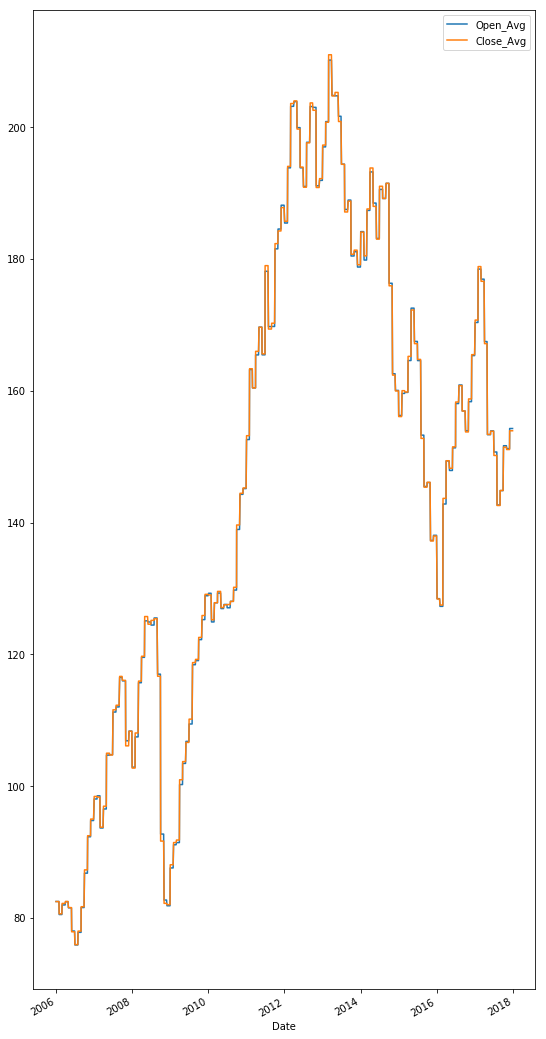

In [24]:
stock_dictionary['IBM'][['Date','Open_Avg','Close_Avg']].set_index('Date').plot()
plt.show()

In above graph we can see that stock price of IBM was all time high in 2014 but then it dipped , the reason which I can interpret was that IBM sold their hardware division to Lenovo , the decision of moving out from computer hardware business, plummeted their stock price.People before 2014 used to identify IBM as a company which had core business in computer hardware business.

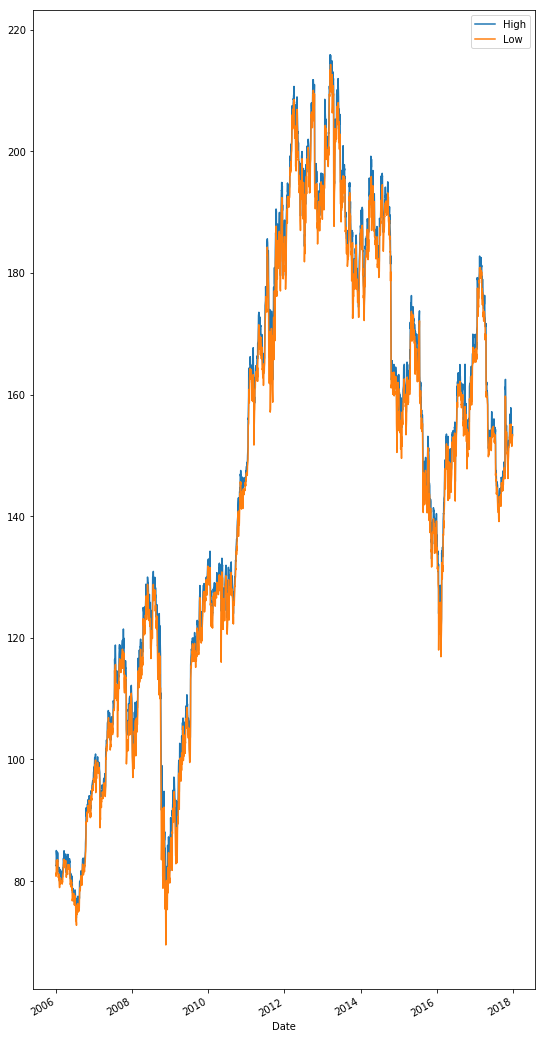

In [25]:
stock_dictionary['IBM'][['Date','High','Low']].set_index('Date').plot()
plt.show()

# Moving Average of IBM stocks from June 2016 to December 2016

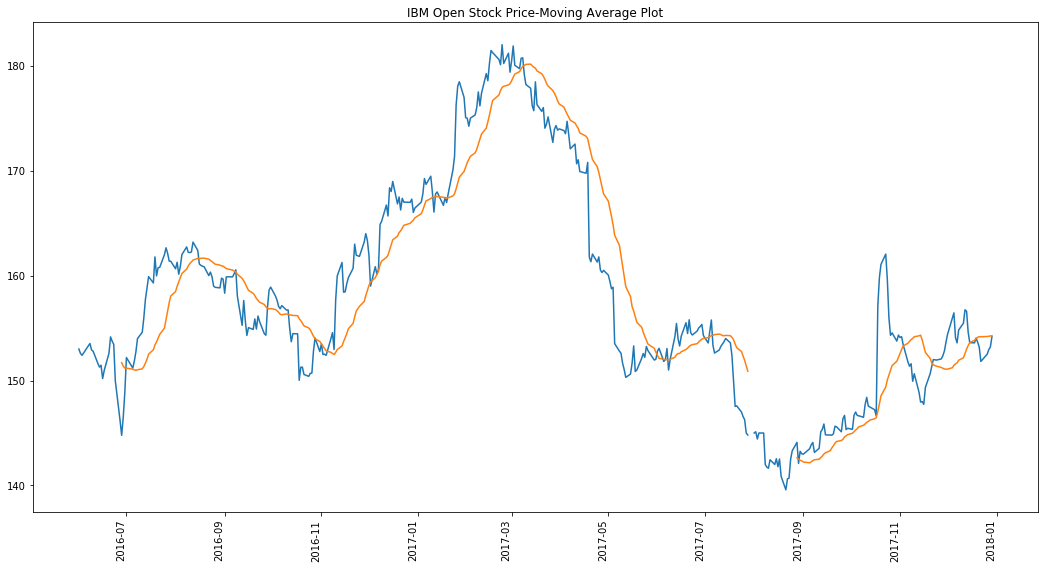

In [19]:

Moving_Avg = stock_dictionary['IBM']

df1= Moving_Avg[Moving_Avg['Date']>='2016-06-01']
date_range = df1['Date']
fig = plt.figure()
fig.set_size_inches(18,10)
ax=fig.add_subplot(111,title="IBM Open Stock Price-Moving Average Plot")

ax.plot(date_range,df1['Open'].values,label="Original")
ax.plot(date_range,df1.rolling(window=20,center=False)["Open"].mean().values)
fig.autofmt_xdate(rotation=90)

Here above we can see that when we apply moving average of Opening of Stock price of IBM we can see that Price was high around 183 dollar during the time of Mar 2017 but later on it dipped and when the date was Dec 2017 its price was around 153 dollar which we can say would be around same price in future month i.e. Jan 2018.

# Performing descriptive analysis of Amazon stocks(Min, Max, explore some moving averages over the time) 

Here we have created a new dataframe for Amazon and calculated the avergage of opening price,closing price,high price,low price and volume of shares traded on monthly basis from 2006 to 2017 . Here we can see that rate of return on stock price from 2006 to 2017 has been approximatly 2300% whereas there is a pattern Amazon has extra ordinarily performed on their stock prices (if we see average of open stock price and average of close stock price).

In [17]:
stock_dictionary['AMZN'].head()

,Date,Open,High,Low,Close,Volume,Name,Month-str,Year-str,Date-str,Open_Avg,High_Avg,Low_Avg,Close_Avg,Volume_Avg
0,2006-01-03,47.47,47.85,46.25,47.58,7582127.0,AMZN,Jan,2006,03,45.2195,45.7595,44.6655,45.2245,6172962.2
1,2006-01-04,47.48,47.73,46.69,47.25,7440914.0,AMZN,Jan,2006,04,45.2195,45.7595,44.6655,45.2245,6172962.2
2,2006-01-05,47.16,48.20,47.11,47.65,5417258.0,AMZN,Jan,2006,05,45.2195,45.7595,44.6655,45.2245,6172962.2
3,2006-01-06,47.97,48.58,47.32,47.87,6154285.0,AMZN,Jan,2006,06,45.2195,45.7595,44.6655,45.2245,6172962.2
4,2006-01-09,46.55,47.10,46.40,47.08,8945056.0,AMZN,Jan,2006,09,45.2195,45.7595,44.6655,45.2245,6172962.2


In [18]:
Amazon_Desc=stock_dictionary['AMZN'][['Year-str','Month-str','Name','Open_Avg','High_Avg','Low_Avg','Close_Avg','Volume_Avg']].groupby(['Year-str','Month-str','Name']).head(1)

Here we can see average price of Amazon stocks on monthly basis , we can see that price of stock in Jan 2006 is 45.21$
which changed to 91.63 dollar by Dec 2007 and further to 1170.88 dollar in Dec 2017 which is approx 2360% increase in rate of return.

In [29]:
Amazon_Desc

,Year-str,Month-str,Name,Open_Avg,High_Avg,Low_Avg,Close_Avg,Volume_Avg
0,2006,Jan,AMZN,45.219500,45.759500,44.665500,45.224500,6.172962e+06
20,2006,Feb,AMZN,38.914737,39.341579,38.183158,38.822105,8.717254e+06
39,2006,Mar,AMZN,36.369130,36.896087,35.998261,36.376522,5.312766e+06
62,2006,Apr,AMZN,36.340526,36.867368,35.772105,36.324211,5.621585e+06
81,2006,May,AMZN,34.146364,34.703182,33.512273,34.128182,6.623027e+06
103,2006,Jun,AMZN,35.065000,35.721364,34.655000,35.268182,5.234224e+06
125,2006,Jul,AMZN,33.531000,33.991500,32.833000,33.257500,1.147596e+07
145,2006,Aug,AMZN,27.661739,28.140435,27.266957,27.796957,6.945209e+06
168,2006,Sep,AMZN,31.485000,32.000000,30.922000,31.540000,7.304236e+06
188,2006,Oct,AMZN,33.730455,34.445000,33.295455,33.930909,9.544666e+06


Here below we can see that Amazon stocks over the period of 12 years. During this duration, it had opening stock price of around 27 dollars with mean price of approx 300 dollars having standard deviation of 280 dollars which shows that there has been lot of variation in Amazon's stock price but overall we have seen increasing trend in the stock prices(first,second, third and maximum) at every category whether it is Open , Close,High and Low. In terms of rate of return, Amazon seems to be one of the best companies for investors who are ready to take risk.

In [30]:
Amazon_Desc.describe()

,Open_Avg,High_Avg,Low_Avg,Close_Avg,Volume_Avg
count,144.000000,144.000000,144.000000,144.000000,1.440000e+02
mean,299.028135,302.066378,295.728396,299.068880,5.942086e+06
std,280.697191,282.427809,278.496046,280.563835,2.975707e+06
min,27.661739,28.140435,27.266957,27.796957,1.991305e+06
25%,81.866071,83.953929,80.349167,82.200595,3.664596e+06
50%,203.348841,206.351449,199.060000,202.425041,5.204555e+06
75%,373.690251,378.615245,371.448469,375.427339,7.274851e+06
max,1170.880500,1177.664500,1160.957000,1168.841500,1.744826e+07


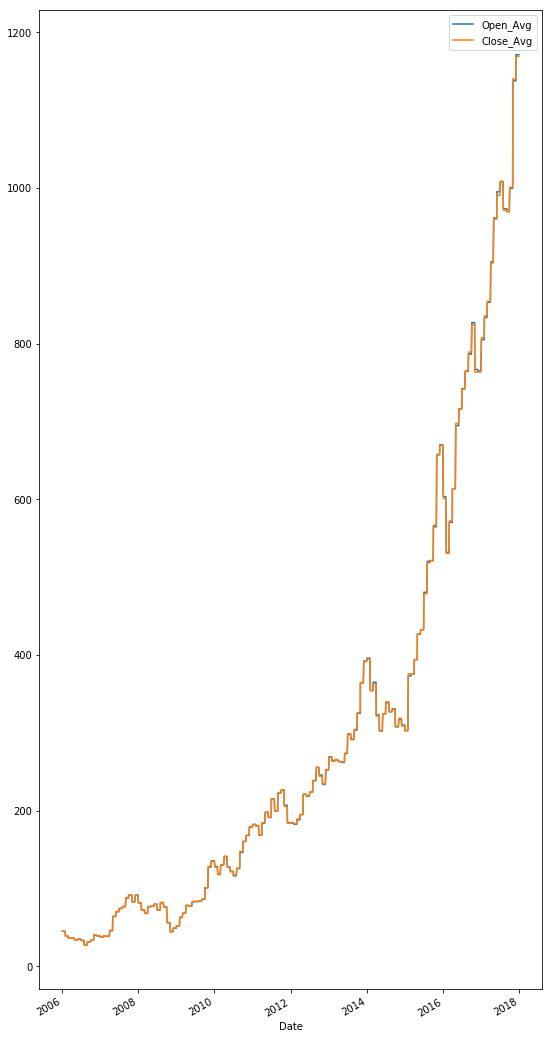

In [31]:
stock_dictionary['AMZN'][['Date','Open_Avg','Close_Avg']].set_index('Date').plot()
plt.show()

Here we can see from both graphs plotted above and below with respect to average opening,average closing ,average high and average low price, that there hasn't been much variation in price.There has been consistency in price pattern,which is good for any investor.Also we can notice that between 2008 to 2010 there wasn't much change in prices and among them 2009 was the lowest point , it is because there was recession and Global economy was highly affected.

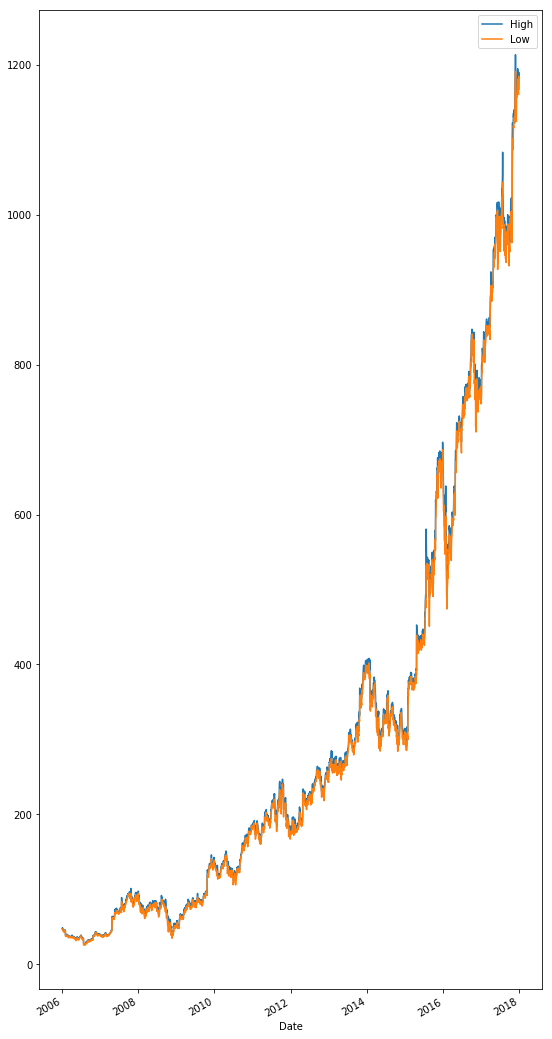

In [32]:
stock_dictionary['AMZN'][['Date','High','Low']].set_index('Date').plot()
plt.show()

# Moving Average of Opening Stock Price of Amazon from June 2016 to December 2016

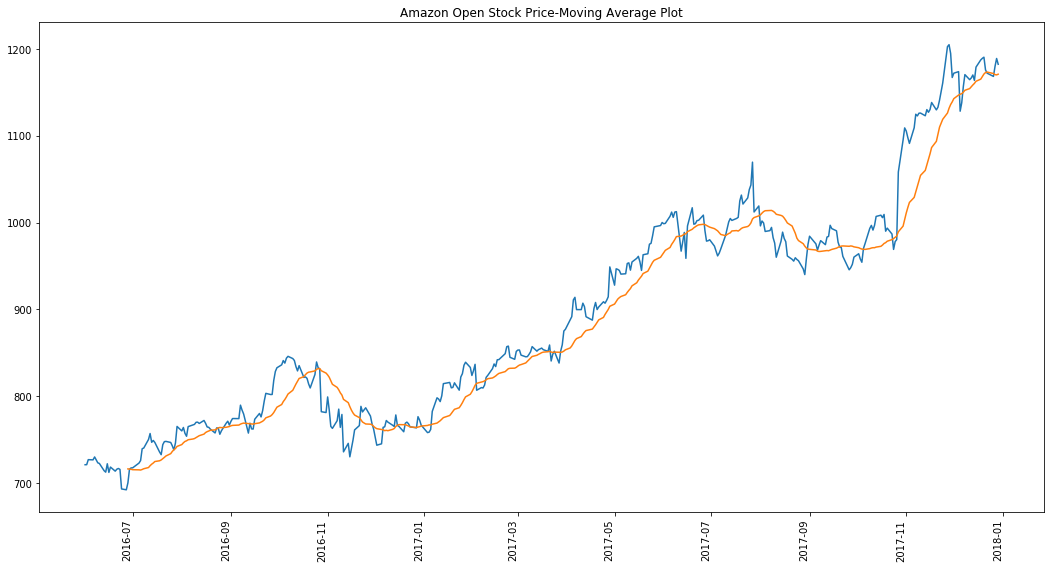

In [22]:
Moving_Avg = stock_dictionary['AMZN']

df1= Moving_Avg[Moving_Avg['Date']>='2016-06-01']
date_range = df1['Date']
fig = plt.figure()
fig.set_size_inches(18,10)
ax=fig.add_subplot(111,title="Amazon Open Stock Price-Moving Average Plot")
ax.plot(date_range,df1['Open'].values,label="Original")
ax.plot(date_range,df1.rolling(window=20,center=False)["Open"].mean().values)
fig.autofmt_xdate(rotation=90)

Here from the graph when we apply moving average of opening stock price of Amazon we can see that price was around 720 dollar on Jun 2016 and then it increased meteorically to 1170 dollar Dec 2017 and from their we can predict the stock price to be $1180. 
Overall the reason for increase in price has been heavy rate of return and almost clear monopoly in Cloud services .i.e. Amazon Web Services and new product line like Alexa,Prime and other technological products.

# Stock comparison of Apple,Google,Microsoft,JP Morgan and Walmart

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
import pylab
pylab.rcParams['figure.figsize'] = (30,15)
plt.style.use('seaborn')

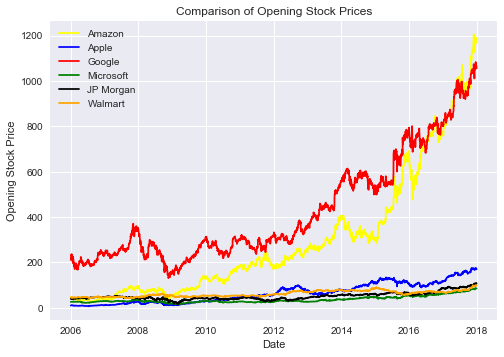

In [31]:
plt.plot(stock_dictionary['AMZN']['Date'], stock_dictionary['AMZN']['Open'],'yellow')
plt.plot(stock_dictionary['AAPL']['Date'], stock_dictionary['AAPL']['Open'],'blue')
plt.plot(stock_dictionary['GOOGL']['Date'], stock_dictionary['GOOGL']['Open'],'red')
plt.plot(stock_dictionary['MSFT']['Date'], stock_dictionary['MSFT']['Open'],'green')
plt.plot(stock_dictionary['JPM']['Date'], stock_dictionary['JPM']['Open'],'black') 
plt.plot(stock_dictionary['WMT']['Date'], stock_dictionary['WMT']['Open'],'orange') 
plt.xlabel('Date')
plt.ylabel('Opening Stock Price')
plt.title('Comparison of Opening Stock Prices')
plt.legend(('Amazon','Apple', 'Google','Microsoft','JP Morgan','Walmart'))
plt.show()

While comparing opening stock prices of Apple,Google,Amazon,JP Morgan,Walmart and Microsoft , we can see that from 2006 to 2018 , Google has been better performing stock but from 2017 onwards
rate of return of Amazon is highest followed by Google,Apple,JP Morgan,Walmart and then Microsoft.
We can see that rate of return for Amazon and Google is approximately 2300% and 450% respectivly for the shareholders who got their shares in 2006 and retained it till 2018.Although it is 12 year time period but as compare to other companies this is considerabe rate of return on stocks.Whereas companies like Walmart, JP Morgan, Apple and Microsoft have not got achieved high stock prices over this tenure. Please note at the time of recession .i.e. period of 2009-2010 , there has been dip in stock prices for almost every company.

In [33]:
print("\n Apple Stock Price Descriptive metrics : \n")
Apple_Desc=stock_dictionary['AAPL'][['Year-str','Month-str','Name','Open_Avg','High_Avg','Low_Avg','Close_Avg']].groupby(['Year-str','Month-str','Name']).head(1)
print(Apple_Desc.describe())
print("\n Google Stock Price Descriptive metrics : \n")
Google_Desc=stock_dictionary['GOOGL'][['Year-str','Month-str','Name','Open_Avg','High_Avg','Low_Avg','Close_Avg']].groupby(['Year-str','Month-str','Name']).head(1)
print(Google_Desc.describe())
print("\n Microsoft Stock Price Descriptive metrics : \n")
Microsoft_Desc=stock_dictionary['MSFT'][['Year-str','Month-str','Name','Open_Avg','High_Avg','Low_Avg','Close_Avg']].groupby(['Year-str','Month-str','Name']).head(1)
print(Microsoft_Desc.describe())
print("\n JP Morgan Stock Price Descriptive metrics : \n")
JPM_Desc=stock_dictionary['JPM'][['Year-str','Month-str','Name','Open_Avg','High_Avg','Low_Avg','Close_Avg']].groupby(['Year-str','Month-str','Name']).head(1)
print(JPM_Desc.describe())
print("\n Walmart Stock Price Descriptive metrics : \n")
Walmart_Desc=stock_dictionary['WMT'][['Year-str','Month-str','Name','Open_Avg','High_Avg','Low_Avg','Close_Avg']].groupby(['Year-str','Month-str','Name']).head(1)
print(Walmart_Desc.describe())
print("\n Amazon Stock Price Descriptive metrics : \n")
Amazon_Desc=stock_dictionary['AMZN'][['Year-str','Month-str','Name','Open_Avg','High_Avg','Low_Avg','Close_Avg']].groupby(['Year-str','Month-str','Name']).head(1)
print(Amazon_Desc.describe())




 Apple Stock Price Descriptive metrics : 

         Open_Avg    High_Avg     Low_Avg   Close_Avg
count  144.000000  144.000000  144.000000  144.000000
mean    64.616502   65.199738   63.976995   64.606002
std     44.610253   44.902147   44.314472   44.623651
min      8.263000    8.410000    8.131500    8.267000
25%     23.596310   23.855833   23.166320   23.543333
50%     58.321753   59.097792   57.588680   58.356753
75%     98.514454   99.359993   97.740982   98.466625
max    172.490000  173.428095  170.990952  172.406190

 Google Stock Price Descriptive metrics : 

          Open_Avg     High_Avg      Low_Avg    Close_Avg
count   144.000000   144.000000   144.000000   144.000000
mean    427.987409   431.619582   423.916875   427.829253
std     236.493773   237.709523   235.092857   236.527060
min     149.358636   153.284545   146.186818   149.923182
25%     248.161326   251.937143   245.085909   248.565673
50%     308.706500   311.917405   305.846250   308.381487
75%     567.573571 

In [72]:
# pylab.rcParams['figure.figsize'] = (25,15)
# import seaborn as sns
# all_arr = [Apple_Desc['Open_Avg'],
#            Google_Desc['Open_Avg'],
#            Microsoft_Desc['Open_Avg'],
#            JPM_Desc['Open_Avg'],
#            Walmart_Desc['Open_Avg'],
#            Amazon_Desc['Open_Avg']]
# box_pd=pd.DataFrame(all_arr)

# sns.boxplot(data=all_arr)
#             #,order=['Apple','Google','Microsoft','JP Morgan','Walmart','Amazon'])
# #sns.boxplot(order=['Apple','Google','Microsoft','JP Morgan','Walmart','Amazon'])

# #x="day", y="total_bill", hue="smoker",
# #data=tips,palette="Set2",fliersize=0

We can see that stock prices of Google is the best among all six companies.Its first quartile and third quartile of stock prices higher than remaining companies which signifies that it is performing better than others.It is also have maximum amount of variation in stock prices as compare to other companies.After 2017 Amazon has overtaken Google but still if we consider 12 years performance, Google has performed better.
Companies like Apple , Microsoft ,JP Morgan and Walmart are not having much deviation in stock prices.This tells us the that growth in these companies have not been at much faster pace as compare to Google (if we assume stock prices to be indicator of firm's growth). As this dataset is from 2006 to 2017 , the investors who wanted took risk of investing in Google in 2006, which was Search Engine company at that time primarily working on data, with lot of hostile competition , would have received highest rate of return among remaining companies.
Similar story has been there for Amazon which started as online ebook store but later on diversified their business from e-commerce to space and cloud platforms.
Whereas companies like Walmart which is multi national retail distributor of products by operating chain of hypermarkets has been performing consistently but not like Google.
Also JP Morgan , which is a financial institution with diversified portfolio is a consistent performer with not much deviation in stock prices during this tenure.
Apple and Microsoft which are tech companies have performed well but relative to Google has been low performer. This does not imply that Apple and Microsoft are not performing as per investor's expectation.Core business and product lines of Apple ( which is mainly in manufacturing Computers,Operating System and Mobile devices) and Microsoft (mainly because of Operating System,Cloud,Gaming and other electronic devices) are focused towards a field which is having low growth rate as compare to online data which has been core business area for Google and Amazon.

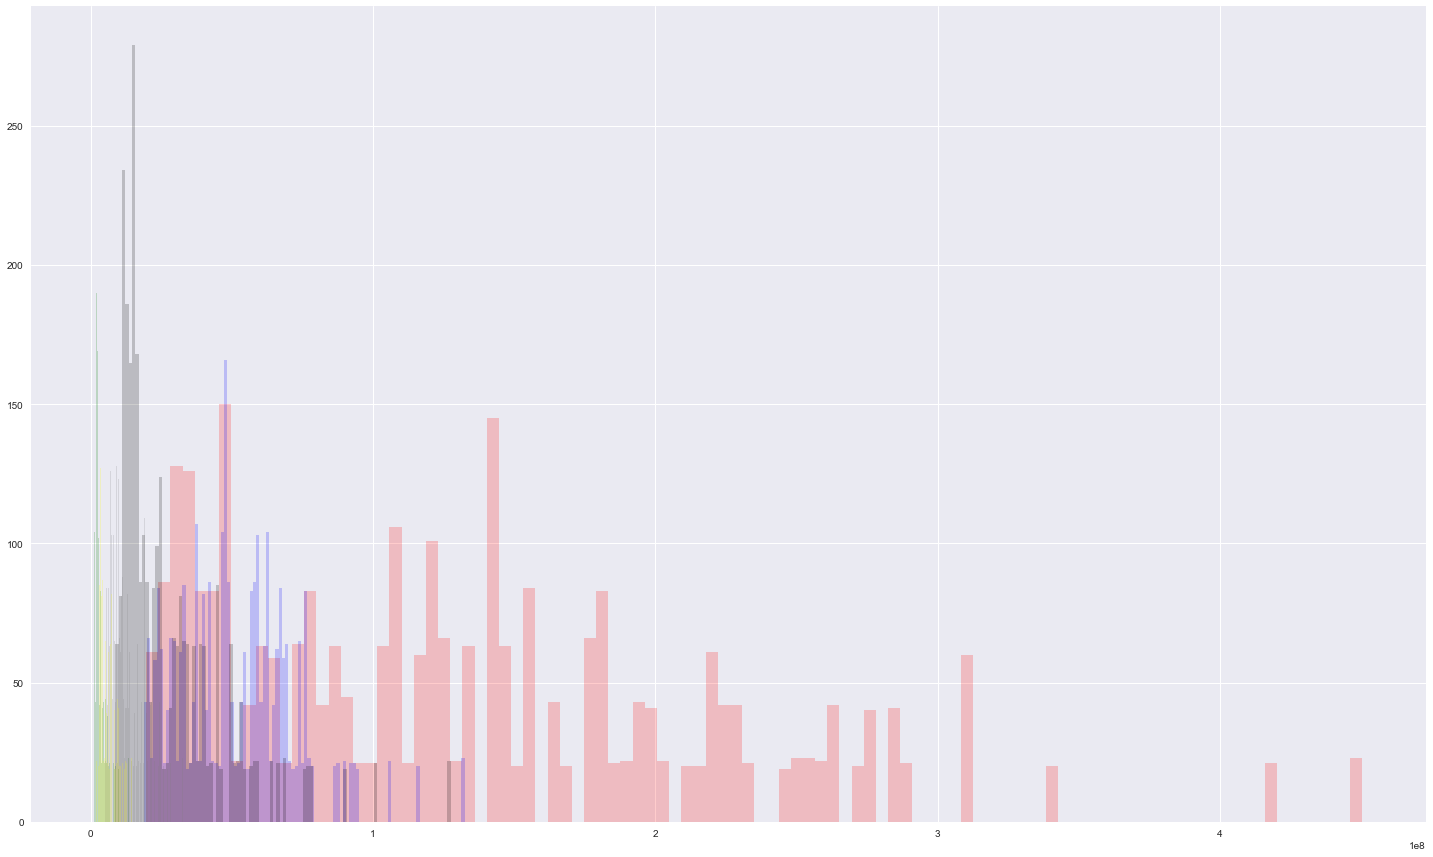

In [82]:
pylab.rcParams['figure.figsize'] = (25,15)
x = []
x.append(stock_dictionary['AAPL']['Volume_Avg'])
x.append(stock_dictionary['GOOGL']['Volume_Avg'])
x.append(stock_dictionary['MSFT']['Volume_Avg'])
x.append(stock_dictionary['JPM']['Volume_Avg'])
x.append(stock_dictionary['WMT']['Volume_Avg'])
x.append(stock_dictionary['AMZN']['Volume_Avg'])
colors = ['red','green','blue','black','grey','yellow']
for i in range(len(colors)):
    plt.hist(x[i], histtype='stepfilled',alpha=0.2, bins=100, color = colors[i])
plt.show()


Here above we can see that volume of share traded per day is maximum for Apple as compare to other companies.


Below is the moving average of stock prices of Apple,Google,Microsoft,JP Morgan,Walmart and Amazon. We can see that there is increasing trend for Google and Amazon Stocks whereas rate of increase in stock prices of remaining companies is almost flat as compare to Google.Predicted price for Google and Amazon will be near to 1050$ and 1080$ respectively, whereas for other companies it will be below 200$ ( if we try to analyze collectively). Also we can see that Amazon stocks have performed at par with Google but after March 2017 they have started outperforming Google stocks, this sudden increase in stocks has been due to increase in demand of cloud platforms and applications/devices focused more towards IOT , prime day sales and acquisition of Whole Foods by Amazon in year 2017.

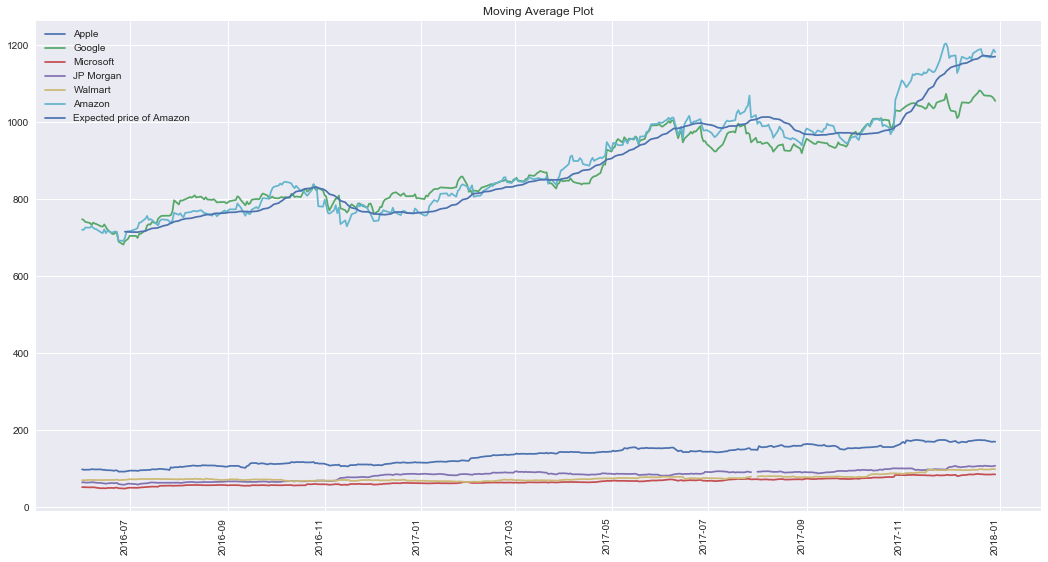

In [83]:
#Moving Average for 2016 June to December
Moving_Avg1 = stock_dictionary['AAPL']
Moving_Avg2 = stock_dictionary['GOOGL']
Moving_Avg3 = stock_dictionary['MSFT']
Moving_Avg4 = stock_dictionary['JPM']
Moving_Avg5 = stock_dictionary['WMT']
Moving_Avg6 = stock_dictionary['AMZN']
df1= Moving_Avg1[Moving_Avg1['Date']>='2016-06-01']
df2= Moving_Avg2[Moving_Avg2['Date']>='2016-06-01']
df3= Moving_Avg3[Moving_Avg3['Date']>='2016-06-01']
df4= Moving_Avg4[Moving_Avg4['Date']>='2016-06-01']
df5= Moving_Avg5[Moving_Avg5['Date']>='2016-06-01']
df6= Moving_Avg6[Moving_Avg6['Date']>='2016-06-01']
date_range1 = df1['Date']
date_range2 = df2['Date']
date_range3 = df3['Date']
date_range4 = df4['Date']
date_range5 = df5['Date']
date_range6 = df6['Date']
fig = plt.figure()
fig.set_size_inches(18,10)
ax=fig.add_subplot(111,title="Moving Average Plot")
ax.plot(date_range1,df1['Open'].values,label="Original")
ax.plot(date_range2,df2['Open'].values,label="Original")
ax.plot(date_range3,df3['Open'].values,label="Original")
ax.plot(date_range4,df4['Open'].values,label="Original")
ax.plot(date_range5,df5['Open'].values,label="Original")
ax.plot(date_range6,df6['Open'].values,label="Original")
ax.plot(date_range,df6.rolling(window=20,center=False)["Open"].mean().values)
fig.autofmt_xdate(rotation=90)
plt.legend(('Apple', 'Google','Microsoft','JP Morgan','Walmart','Amazon','Expected price of Amazon'))
plt.show()